In [18]:
import os
import sys; sys.path.append('../lib')
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

from data import Text
from gradients import compare_gradients_recurrent
from history import TrainHistoryRecurrent
from recurrent_network import RecurrentNetwork

# Constants

In [4]:
DATA_DIR = '../data'
PICKLE_DIR = '../pickle'
FIGURE_DIR = '../figures'

HYPERPARAMS = {
    'hidden_state_size': 100,
    'sequence_length': 25,
    'eta': 0.1,
    'updates': 100000
}

# Load data

In [5]:
text = Text(DATA_DIR, 'goblet_book.txt')

# Compare analytical and numerical gradient

In [6]:
ds = text.sequence(beg=0,
                   end=HYPERPARAMS['sequence_length'],
                   rep='indices_one_hot',
                   labeled=True)

network_constructor = partial(
    RecurrentNetwork,
    input_size=text.num_characters,
    hidden_state_size=5)

compare_gradients_recurrent(network_constructor,
                            ds,
                            h=1e-4,
                            random_seed=0)

U:
Absolute difference: max = 4.69e-08, mean = 2.23e-09, std = 6.53e-09
Relative difference: max = 7.12e-05, mean = 4.89e-07, std = 4.07e-06

V:
Absolute difference: max = 2.35e-09, mean = 1.27e-09, std = 5.41e-10
Relative difference: max = 5.02e-06, mean = 1.39e-06, std = 1.41e-06

W:
Absolute difference: max = 4.24e-08, mean = 5.34e-09, std = 1.16e-08
Relative difference: max = 5.02e-04, mean = 3.37e-05, std = 1.04e-04

b:
Absolute difference: max = 2.03e-07, mean = 1.56e-07, std = 3.38e-08
Relative difference: max = 1.31e-05, mean = 4.74e-06, std = 4.56e-06

c:
Absolute difference: max = 1.54e-05, mean = 1.54e-05, std = 7.60e-10
Relative difference: max = 2.47e-05, mean = 2.17e-05, std = 6.62e-06



# Train network

In [7]:
network = RecurrentNetwork(
    input_size=text.num_characters,
    hidden_state_size=HYPERPARAMS['hidden_state_size'],
    random_seed=0)

history = network.train(
    text,
    sequence_length=HYPERPARAMS['sequence_length'],
    eta=HYPERPARAMS['eta'],
    n_updates=HYPERPARAMS['updates'],
    verbose=True,
    verbose_show_loss=False,
    verbose_show_samples=True)

history.save(PICKLE_DIR, postfix='rnn_goblet')

iteration 0/100000:
Gitzx;2L)dSüDRFEkmo/üQaHyP"Q:muvQzSqdYwEsNqKyEFB;EOuüWAJ?P
9cnh2"MNENyjTQ9O')EhFkT7mAfQOoYPuRHLdr^X     OYN?    exH     oRKsD?
WEbGC_?ü67EEJBn NTD sxhBh_
wk0SO^}U_MIYX_GmhaF4MrXXD,aYo0qg}'DwüQhQKJfs7Mmyi_NU-}CCO

iteration 10000/100000:
rsurof tarplorisn!" shad, in d Mr seat?" Ha drecsy the qugels ofg amuinp ap was
Cwowthaln aroid he doked Boll, wate wai:  Bived. .  "Ap leccetinghe abon't Hind
Draverill, y be,  ofbecal mav'igg To the

iteration 20000/100000:
iciint astlore't Hacry wass hit wee pretemee wonqenory got was sibked Hermiot
thas nosthoke heren ferimaide's - waicce of the Gromittouts jusuy stranh es,
obostinon,"  "He peale Harnyon hes - you lack

iteration 30000/100000:
ir - in the has mud a faistels ar Flinks as takeinge well comblens dis ham
Chothe looking hir! .....  Reeked to knou the ouse Dicep conost, dood the ould
fue lyon harre fild his pEin in he ss.  "Bege

iteration 40000/100000:
wer, myting the me ons, Vliat uSiled now nat the cracter threm, da

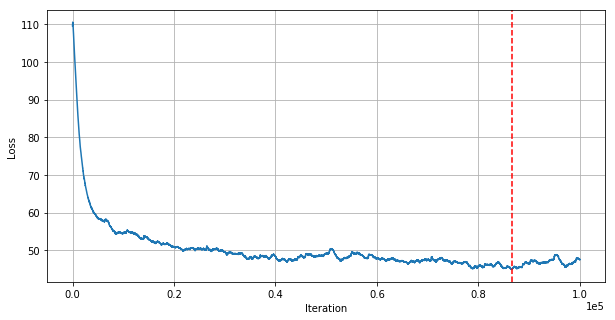

In [19]:
history = TrainHistoryRecurrent.load(PICKLE_DIR, postfix='rnn_goblet')

history.visualize()

plt.savefig(os.path.join(FIGURE_DIR, 'rnn_loss.svg'))

In [14]:
np.random.seed(0)

sequence = network.synthesize(
    x_init=text.get_index('.', one_hot=True),
    length=1000)

sequence = text.get_characters(sequence, one_hot=True)

print(sequence)

  "Ss Ap, glart dime up iturr mure eyon intercicred and he not and haired hid terstery and which that tnoun there frempel?" Crexilves Seainsad on reed everitge . . dohe coulded bech had we him out fot Dumaisioce.  Jlut thit's seaink bers rabled the preying and becpoofsly.  He weat, sking, agneyed tath his exict. Herdied his with as.  "Whon hip sprested my tomocglle was goned it her, Cup am bake eletiot com the look. "Wul his cal Mr.  CrouD beain't then" Harry and Cedry't they yslip; nlistinf the rooulted uf were verie and whe the that tild he more  pourd faomed lown like in you congorexing and onl's maclad, a stostastlane all Harry alite outhing shot was dento they, coupe was juimaine.  Andy reameles."
He kitt shousiess were he fack to a dave his lyosstremeding lye, pume.  Bowing estistring.
"Dobneg he porive feat in themadyed of frong.  Ye maded theilus olven the it.  Harry she he he as sume, ko sleamss wesly of hambly Poofo't sarene.  Vo thating and ang ithe! into't ap leonst to kite